# Transformer Architectures
In the previous sections, we introduced the general Transformer architecture and explored how these models can solve various tasks. Now, let’s take a closer look at the three main architectural variants of Transformer models and understand when to use each one. Then, we look at how those architectures are applied to different language tasks.

In this section, we’re going to dive deeper into the three main architectural variants of Transformer models and understand when to use each one.

Remember that most Transformer models use one of three architectures: encoder-only, decoder-only, or encoder-decoder (sequence-to-sequence). Understanding these differences will help you choose the right model for your specific task.

## Encoder Models

Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.

The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

As we saw in How 🤗 Transformers solve tasks, encoder models like BERT excel at understanding text because they can look at the entire context in both directions. This makes them perfect for tasks where comprehension of the whole input is important.

Representatives of this family of models include:

    BERT
    DistilBERT
    ModernBERT

## Decoder Models
Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Decoder models like GPT are designed to generate text by predicting one token at a time. As we explored in How 🤗 Transformers solve tasks, they can only see previous tokens, which makes them excellent for creative text generation but less ideal for tasks requiring bidirectional understanding.

Representatives of this family of models include:

    Hugging Face SmolLM Series
    Meta’s Llama Series
    Google’s Gemma Series
    DeepSeek’s V3

### Modern Large Language Models (LLMs)
Most modern Large Language Models (LLMs) use the decoder-only architecture. These models have grown dramatically in size and capabilities over the past few years, with some of the largest models containing hundreds of billions of parameters.

Modern LLMs are typically trained in two phases:

1) Pretraining: The model learns to predict the next token on vast amounts of text data
2) Instruction tuning: The model is fine-tuned to follow instructions and generate helpful responses

This approach has led to models that can understand and generate human-like text across a wide range of topics and tasks.

#1 Capability #2 Description #3 Example

    Text generation	Creating coherent and contextually relevant text	Writing essays, stories, or emails
    
    Summarization	Condensing long documents into shorter versions	Creating executive summaries of reports
    
    Translation	Converting text between languages	Translating English to Spanish
    
    Question answering	Providing answers to factual questions	“What is the capital of France?”
    
    Code generation	Writing or completing code snippets	Creating a function based on a description
    
    Reasoning	Working through problems step by step	Solving math problems or logical puzzles
    
    Few-shot learning	Learning from a few examples in the prompt	Classifying text after seeing just 2-3 examples
    
    You can experiment with decoder-based LLMs directly in your browser via model repo pages on the Hub. Here’s an example with the classic GPT-2 (OpenAI’s finest open source model!):

## Sequence to sequnce models

Encoder-decoder models (also called sequence-to-sequence models) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can take different forms, but it often involves reconstructing a sentence for which the input has been somehow corrupted (for instance by masking random words). The pretraining of the T5 model consists of replacing random spans of text (that can contain several words) with a single mask special token, and the task is then to predict the text that this mask token replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

As we saw in How 🤗 Transformers solve tasks, encoder-decoder models like BART and T5 combine the strengths of both architectures. The encoder provides deep bidirectional understanding of the input, while the decoder generates appropriate output text. This makes them perfect for tasks that transform one sequence into another, like translation or summarization.

### practical applications

Sequence-to-sequence models excel at tasks that require transforming one form of text into another while preserving meaning. Some practical applications include:

#1 application #2 description #3 examples model 

    Machine translation	Converting text between languages	Marian, T5
    
    Text summarization	Creating concise summaries of longer texts	BART, T5
    
    Data-to-text generation	Converting structured data into natural language	T5
    
    Grammar correction	Fixing grammatical errors in text	T5
    
    Question answering	Generating answers based on context	BART, T5

Representatives of this family of models include:

    BART
    mBART
    Marian
    T5

## Choosing the right architecture
When working on a specific NLP task, how do you decide which architecture to use? Here’s a quick guide:

#1 task #2 suggested architecture #3 examples

    Text classification (sentiment, topic)	Encoder	BERT, RoBERTa
    Text generation (creative writing)	Decoder	GPT, LLaMA
    Translation	Encoder-Decoder	T5, BART
    Summarization	Encoder-Decoder	BART, T5
    Named entity recognition	Encoder	BERT, RoBERTa
    Question answering (extractive)	Encoder	BERT, RoBERTa
    Question answering (generative)	Encoder-Decoder or Decoder	T5, GPT
    Conversational AI	Decoder	GPT, LLaMA

When in doubt about which model to use, consider:

    What kind of understanding does your task need? (Bidirectional or unidirectional)
    Are you generating new text or analyzing existing text?
    Do you need to transform one sequence into another?
    
The answers to these questions will guide you toward the right architecture.

## The evolution of LLMs
Large Language Models have evolved rapidly in recent years, with each generation bringing significant improvements in capabilities.

## Attention mechanisms
Most transformer models use full attention in the sense that the attention matrix is square. It can be a big computational bottleneck when you have long texts. Longformer and reformer are models that try to be more efficient and use a sparse version of the attention matrix to speed up training.

Standard attention mechanisms have a computational complexity of O(n²), where n is the sequence length. This becomes problematic for very long sequences. The specialized attention mechanisms below help address this limitation.

### LSH attention
Reformer uses LSH attention. In the softmax(QK^t), only the biggest elements (in the softmax dimension) of the matrix QK^t are going to give useful contributions. So for each query q in Q, we can consider only the keys k in K that are close to q. A hash function is used to determine if q and k are close. The attention mask is modified to mask the current token (except at the first position), because it will give a query and a key equal (so very similar to each other). Since the hash can be a bit random, several hash functions are used in practice (determined by a n_rounds parameter) and then are averaged together.

### Local attention
Longformer uses local attention: often, the local context (e.g., what are the two tokens to the left and right?) is enough to take action for a given token. Also, by stacking attention layers that have a small window, the last layer will have a receptive field of more than just the tokens in the window, allowing them to build a representation of the whole sentence.

Some preselected input tokens are also given global attention: for those few tokens, the attention matrix can access all tokens and this process is symmetric: all other tokens have access to those specific tokens (on top of the ones in their local window). This is shown in Figure 2d of the paper, see below for a sample attention mask:

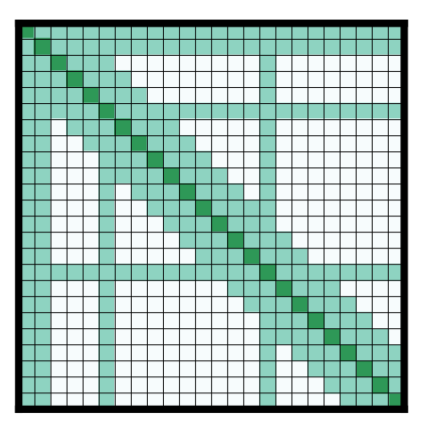

Using those attention matrices with less parameters then allows the model to have inputs having a bigger sequence length.


### Axial positional encodings

Remorfer uses axial positional encodings: in traditional models the positional encodings E is a matrix of size l by d, l being the sequence lengths and d the dimensions of the hidden state. if you have very long texts, this matrix can be huge and take way too much space on the gPU. To alleviate that, axial positional econding consists of factorizing that big matrix E in two smaller matrices E1 and E2 with dimensions l1 * d1 andf l2 * d2, such that l1 * l2 = l and d1 + d2 = d (with the product for the lengths, this ends up being way smaller). The embedding for time step j in E is obtained by concatinating the embeddings for timestep j%l1 in E1 and j//l1 in E2.

## Conclusion
In this section, we’ve explored the three main Transformer architectures and some specialized attention mechanisms. Understanding these architectural differences is crucial for selecting the right model for your specific NLP task.

As we move forward in the course, you’ll get hands-on experience with these different architectures and learn how to fine-tune them for your specific needs. In the next section, we’ll look at some of the limitations and biases present in these models that you should be aware of when deploying them.